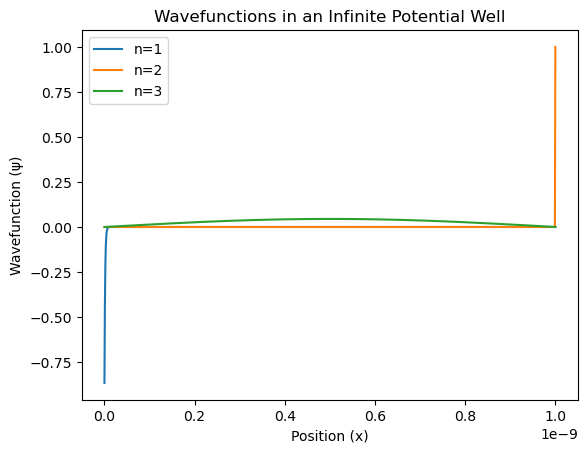

Energy eigenvalues:
E_1 = 3.05e-15 J
E_2 = -6.10e-39 J
E_3 = -6.04e-20 J


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
hbar = 1.0545718e-34  # Reduced Planck's constant (Joule-second)
m = 9.10938356e-31    # Mass of electron (kg)
L = 1e-9             # Width of the potential well (1 nm)
N = 1000             # Number of grid points
x = np.linspace(0, L, N)  # Discretize the domain into N points
dx = x[1] - x[0]     # Grid spacing

# Potential V(x): 0 inside the well, infinity outside
V = np.zeros(N)

# Finite difference approximation of the second derivative
# Construct the Hamiltonian matrix
H = np.zeros((N, N))

for i in range(1, N-1):
    H[i, i-1] = -1 / (dx**2)
    H[i, i] = 2 / (dx**2) + V[i]
    H[i, i+1] = -1 / (dx**2)

# Boundary conditions: wavefunction is zero at the boundaries
H[0, 0] = 1
H[-1, -1] = 1

# Solve for eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eigh(H)

# Scale the eigenvalues by the factor -hbar^2 / (2m)
eigenvalues = -hbar**2 / (2 * m) * eigenvalues

# Plot the first few eigenfunctions
for n in range(3):  # Plot the first 3 eigenfunctions
    plt.plot(x, eigenvectors[:, n], label=f'n={n+1}')

plt.title('Wavefunctions in an Infinite Potential Well')
plt.xlabel('Position (x)')
plt.ylabel('Wavefunction (ψ)')
plt.legend()
plt.show()

# Print the first few energy eigenvalues
print("Energy eigenvalues:")
for n in range(3):
    print(f'E_{n+1} = {eigenvalues[n]:.2e} J')